In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing and Examining the Data

First let's download import the dataset with pandas from the .csv file

In [226]:
df = pd.read_csv("data/raw/cirrhosis/cirrhosis.csv", index_col="ID")

Now let's take a quick look at what we're working with

In [227]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [228]:
df.shape

(418, 19)

It looks like our dataset is fairly small, 418 rows with 19 features, one of them, the Stage column being the y value for our dataset. The provided info for each feature is the following:
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


For our numerical features, we can see we have quite a few missing values in the columns: Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin and Stage. Given the size of our dataset this is far from ideal but we have to work with it. In particular it seems like 6 instances where Stage is missing have to be dropped since they won't be able to be used at all, either for training or for testing. Luckily it is only 6 rows that have to be dropped entirely. 

In [230]:
df.describe(exclude="number").T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


For our categorical values we also seem to be missing about 1/4 of the entries for the categories of Ascites, Hepatomegaly, Spiders and Drugs. Luckily for each of these we seem to only have 2 categories. 


Now let's see the distribution of our data:

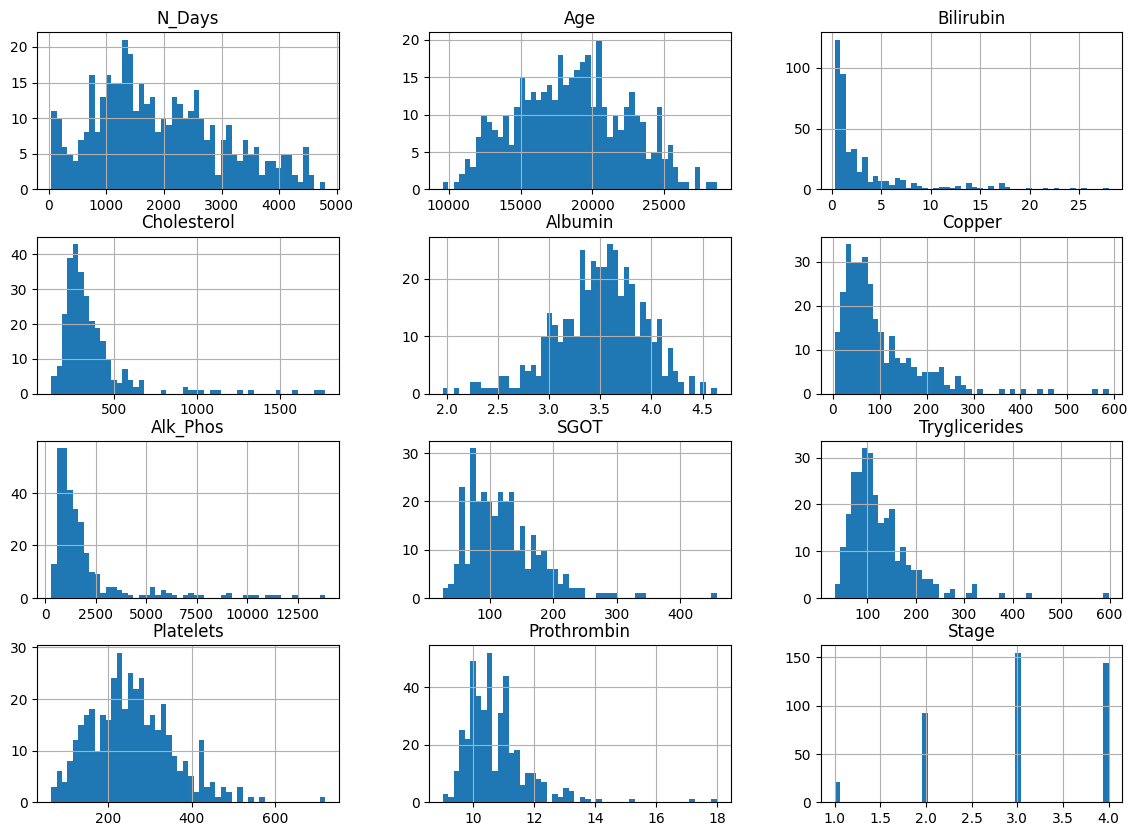

In [231]:
df.hist(bins=50, figsize=(14, 10))
plt.show()

The data seems to be distributed either somewhat gaussian or tail heavy distributions, this will be important when it comes to scaling our features. The only standout among these is Stage which is discritely distributed, this is because this feature is categorical. 

Now it would be useful to see how each feature is correlated to each other. Before doing this however, we'll make a small transformer to encode our categorical values as numerical so we can also see how all of our features correlate to one another. 

In [232]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [233]:
print(df["Status"].unique())
print(df["Edema"].unique())

['D' 'C' 'CL']
['Y' 'N' 'S']


We can actually use ordinal encoding for all our categorical features, most of these are binary. The only exceptions are Status and Edema which have the above listed values. Let's take a look at what they mean:
- 3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death).
- 10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).

Both of these make sense when encoded numerically and in rising values, as each one is rising in severity. We will also use ordinal encoding for these.

In [234]:
correlation_copy = df.copy(deep=True)

ordinal_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='error'))

 
correlation_encoder = make_column_transformer(
    (ordinal_pipeline, make_column_selector(dtype_exclude=np.number)),
    remainder="passthrough"
)

transformed_corr = correlation_encoder.fit_transform(correlation_copy)
transformed_corr_df = pd.DataFrame(transformed_corr, 
                                    columns=correlation_encoder.get_feature_names_out(),
                                    index=df.index)

In [235]:
transformed_corr_df.head()

,pipeline__Status,pipeline__Drug,pipeline__Sex,pipeline__Ascites,pipeline__Hepatomegaly,pipeline__Spiders,pipeline__Edema,remainder__N_Days,remainder__Age,remainder__Bilirubin,remainder__Cholesterol,remainder__Albumin,remainder__Copper,remainder__Alk_Phos,remainder__SGOT,remainder__Tryglicerides,remainder__Platelets,remainder__Prothrombin,remainder__Stage
ID,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,0.0,1.0,1.0,1.0,2.0,400.0,21464.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4500.0,20617.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1012.0,25594.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1925.0,19994.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1504.0,13918.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Now we have all our features as numerical, although they aren't scaled yet. Before we visualize we will actually drop our Stage column, since we don't want to bias ourselves by looking at how each of the features correlates to the our y value before we even begin training our models.

In [236]:
transformed_corr_df = transformed_corr_df.drop('remainder__Stage', axis=1)
transformed_corr_df.columns

Index(['pipeline__Status', 'pipeline__Drug', 'pipeline__Sex',
       'pipeline__Ascites', 'pipeline__Hepatomegaly', 'pipeline__Spiders',
       'pipeline__Edema', 'remainder__N_Days', 'remainder__Age',
       'remainder__Bilirubin', 'remainder__Cholesterol', 'remainder__Albumin',
       'remainder__Copper', 'remainder__Alk_Phos', 'remainder__SGOT',
       'remainder__Tryglicerides', 'remainder__Platelets',
       'remainder__Prothrombin'],
      dtype='object')

Now we can take a quick look at our correlation matrix:

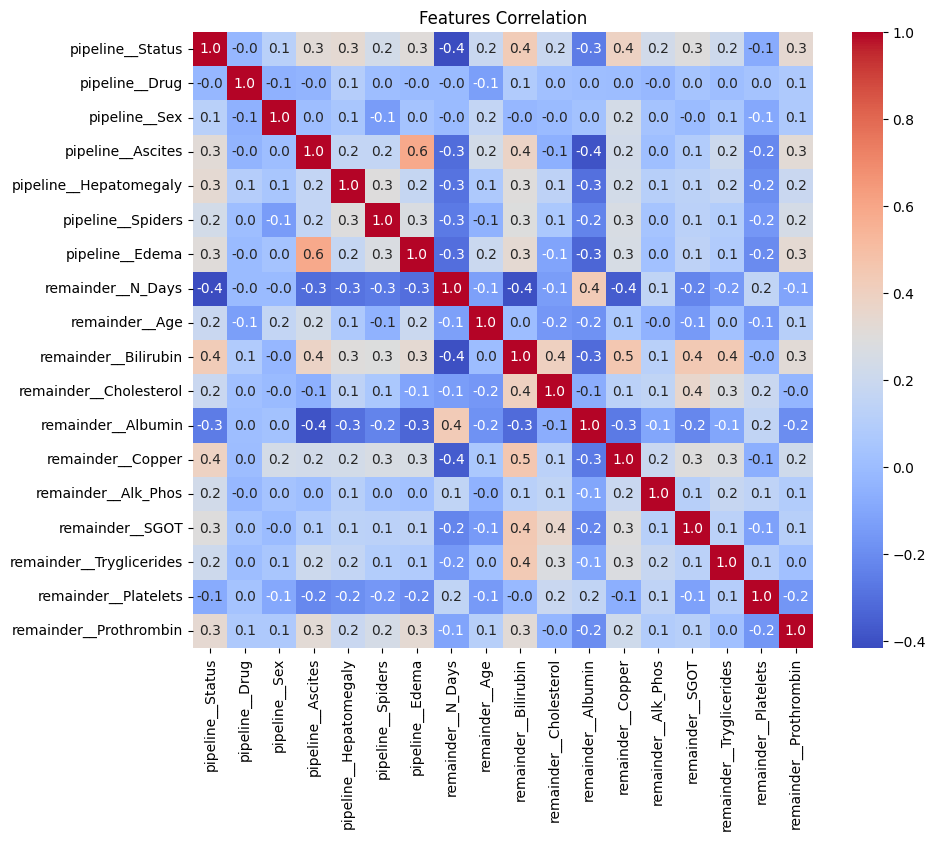

In [237]:
import seaborn as sns 

corr_mat = transformed_corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Features Correlation")
plt.show()

Here we have a lot of interesting findings:
- Edemas and ascites are highly related
- Copper, SGOT, Tryglicerides, Prothrombin and Cholesterol seem to be correlated to Bilirubin, Albumin is negatively related. 
- Age, sex, Alk_Phos and Platelets seem to be not be very strongly related to the other features.
- Interestingly neither does drug (drug indicates whether the patient actually took the drug or was given a placebo, the drug might not have been very effective).
- Number of days seems to be mostly negatively related to most other things, except for Albumin.

It can be quite difficult to engineer features when one is unfamiliar with the object of study, bear in mind that we want to avoid creating colinear features, so we will err on the safe side of things. My proposed features are
- Ascites * Edema 
- Albumin * Platelets, notice that these are the only features with a negative correlation to Status. I imagine status might be quite important to predicting the stage.


Before we prepare the data for training let's take another look at the histogram for our dataset now that all our features are numerical:

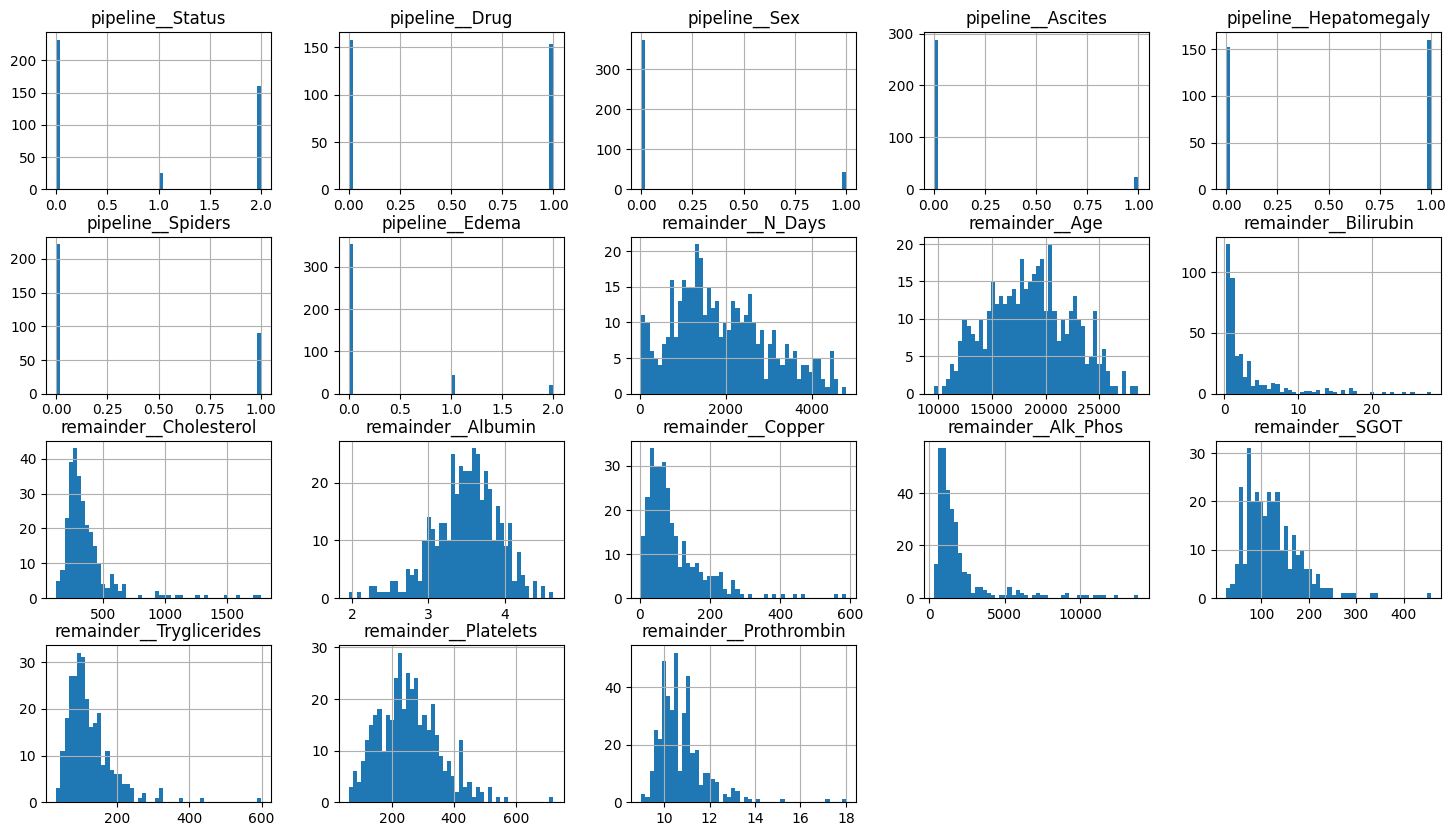

In [238]:
transformed_corr_df.hist(bins=50, figsize=(18, 10), layout=(4,5))
plt.show()

# Train Test Split

First we will drop the 6 rows where our y value is unknown.

In [239]:
df_copy = df.copy(deep=True)
df_copy = df_copy[df["Stage"].notnull()]

In [240]:
y = df_copy["Stage"].copy()
X = df_copy.copy()
X.drop("Stage", axis=1, inplace=True)

In [241]:
print(X.shape)
print(y.shape)

(412, 18)
(412,)


In [242]:
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
ID,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

# Preparing the data (Pipelines)

Now that we have our train and test sets we can go ahead and start making our pipelines.
In short we want to:
- fill out missing values, for numerical columns this will be done with the mean or median, for the categorical it will be done with the mode.
- Scale our numerical rows, for the tail heavy distributions we will first take the logarithm of each instance.
- We want to encode our categorical features as we did previously.
- We will create our two new features.

In [244]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [245]:
X_train.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

We will preprocess our features according to whether they are categorical or numerical, for the numerical ones we'll also take care to logarithmically scale our long tailed distributions so they're more uniformly spread when scaled down.
The categorical features can be included according to their type, thus we will not explicitly list them.

In [246]:
log_features = ["Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]
normal_features = ["N_Days", "Age"]

In [247]:
# this is to make sure our categories are encoded correctly
category_encodings = {
    "Drug": ["Placebo", "D-penicillamine"],
    "Sex": ["F", "M"],
    "Ascites": ["N", "Y"], 
    "Hepatomegaly": ["N", "Y"], 
    "Spiders": ["N", "Y"], 
    "Edema": ["N", "S", "Y"], 
    "Status": ["C", "CL", "D"]
}

We have to define our own function to create our new features

In [248]:
def column_and(X):
    return X[:, [0]] * X[:, [1]] 

def and_name(function_transformer, feature_names_in):
    return ["and"] # feature names out

def and_pipeline(features):
    encodings = [category_encodings[feature] for feature in features]
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder(categories=encodings),
        FunctionTransformer(column_and, feature_names_out=and_name)
    )

In [249]:
def column_times(X):
    return X[:, [0]] * X[:, [1]]

def times_name(function_transformer, feature_names_in):
    return ["times"]

def times_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        FunctionTransformer(column_times, feature_names_out=times_name),
        StandardScaler()
    )

In [250]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

normal_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

def categorical_pipeline(features): 
    encodings = [category_encodings[feature] for feature in features]
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder(categories=encodings)
    )

In [251]:
categorical = list(X_train.select_dtypes(object).columns)
preprocessing = make_column_transformer(
    (log_pipeline, log_features),
    (normal_pipeline, normal_features),
    (categorical_pipeline(categorical), categorical),
    (and_pipeline(["Ascites", "Edema"]), ["Ascites", "Edema"]),
    (times_pipeline(), ["Albumin", "Platelets"]),
    remainder="passthrough"
)

In [252]:
X_prepared = preprocessing.fit_transform(X_train)
X_prepared_df = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)
X_prepared.shape

(329, 20)

In [253]:
X_prepared_df.head(2)

,pipeline-1__Bilirubin,pipeline-1__Cholesterol,pipeline-1__Albumin,pipeline-1__Copper,pipeline-1__Alk_Phos,pipeline-1__SGOT,pipeline-1__Tryglicerides,pipeline-1__Platelets,pipeline-1__Prothrombin,pipeline-2__N_Days,pipeline-2__Age,pipeline-3__Status,pipeline-3__Drug,pipeline-3__Sex,pipeline-3__Ascites,pipeline-3__Hepatomegaly,pipeline-3__Spiders,pipeline-3__Edema,pipeline-4__and,pipeline-5__times
ID,,,,,,,,,,,,,,,,,,,,
280,-0.125915,-0.023145,0.471203,-0.091303,0.915665,0.580251,0.643523,0.429766,-1.22949,-0.416981,-0.434681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592739
307,-0.802408,-0.500377,0.193588,-0.479509,-0.174643,0.347905,-1.720871,0.898173,-0.19713,-0.657444,-1.894548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636426


# Preliminary Model Exploration

We're done with preprocessing! Now we can start training various models and see how they perform out of the box. We'll try out the following classifiers:
- Decision Tree
- Logistic Regression
- Linear SVC
- Poly SVM 
- RBF SVM

In [254]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [255]:
pre_naive_clf = GaussianNB()
pre_lin_sdg_clf = SGDClassifier(random_state=21)
pre_lin_svm_clf = LinearSVC(random_state=21)
pre_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=21)
pre_rbf_clf = SVC(kernel="rbf", random_state=21, probability=True)
pre_poly_clf = SVC(kernel="poly", max_iter=1000, degree=3, random_state=21, probability=True)
pre_logit_clf = LogisticRegression(random_state=21)
pre_mlp_clf = MLPClassifier(max_iter=2000, random_state=21)
pre_tree_clf = DecisionTreeClassifier(random_state=21)
pre_estimators = {
                    "Gaussian Classifier": pre_naive_clf,
                    "SGD Classifier": pre_lin_sdg_clf,
                    "Linear SVM Classifier": pre_lin_svm_clf,
                    "Random Forest Classifier": pre_forest_clf,
                    "SVC with RBF Kernel": pre_rbf_clf,
                    "SVC with Poly Kernel": pre_poly_clf,
                    "Logistic Regression Classifier": pre_logit_clf,
                    "Multilayer Perceptron Classifier": pre_mlp_clf,
                    "Decision Tree Classifier": pre_tree_clf
                 }

In [256]:
print("Estimators' cross evaluation with 3 folds")
first_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    first_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds
Gaussian Classifier: 0.19761
SGD Classifier: 0.44993
Linear SVM Classifier: 0.46202
Random Forest Classifier: 0.50461
SVC with RBF Kernel: 0.50464
SVC with Poly Kernel: 0.46191
Logistic Regression Classifier: 0.51977
Multilayer Perceptron Classifier: 0.42263
Decision Tree Classifier: 0.39508


None of them are looking very good honestly, our best models are barely getting a score above 50%. Let's take a look at the importance of each feature according to our decision tree

# Feature weights

In [257]:
d = {"Feature Name": X_prepared_df, "Importance": pre_forest_clf.feature_importances_}
importance_table = pd.DataFrame(index=X_prepared_df.columns, data=pre_forest_clf.feature_importances_, columns=["Weight"])
importance_table.sort_values(by="Weight", ascending=False, inplace=True)
importance_table

,Weight
pipeline-2__N_Days,0.179082
pipeline-5__times,0.121344
pipeline-1__Prothrombin,0.116422
pipeline-1__Platelets,0.093513
pipeline-1__Albumin,0.075475
pipeline-2__Age,0.069871
pipeline-1__Bilirubin,0.065532
pipeline-1__Copper,0.047090
pipeline-3__Hepatomegaly,0.033757
pipeline-3__Status,0.033528


It looks like one our engineered features is our best performing features for this dataset! The other is actually one of our worst performing but that's ok as well.
It seems like not all of our features are all that important for the model we have 20 features in total yet only 14 account for 95% of the weight for our predictions.
Whenever we do dimensionality reduction preprocessing 95% is usually our desired amount of variance too keep. We will not actually be doing dimensionality reduction since our dataset is not very high dimensional, remember it's only 20 features, and for this kind of task the readability of our interpretations is worth quite a lot. We will simply drop our worst performing 6 predictors.

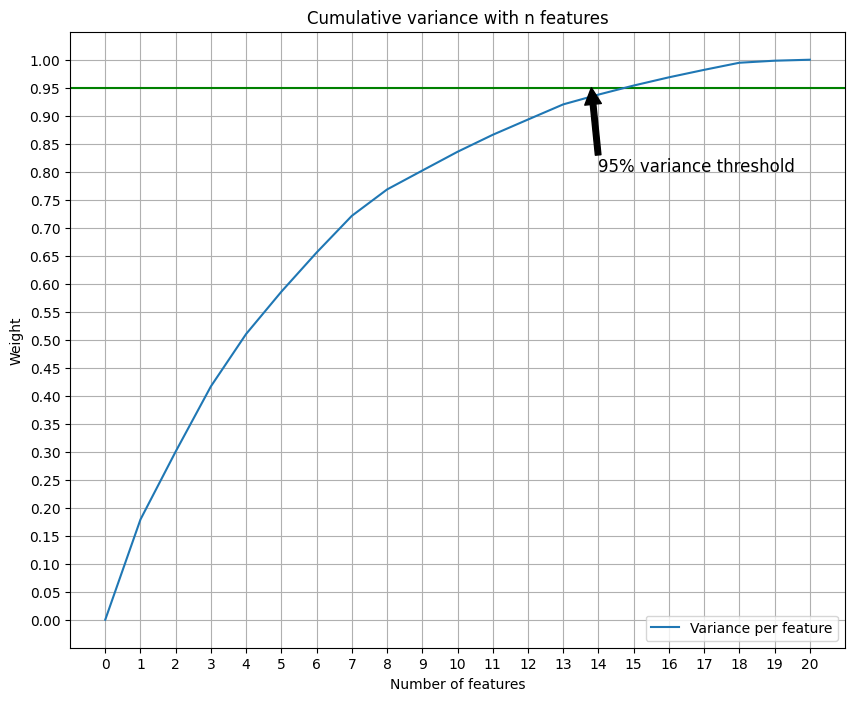

In [258]:
y_vals = list(range(len(importance_table)+1))
importance_variance = np.add.accumulate(importance_table)
importance_variance = np.append([0], importance_variance) # We need to shift our data 1 place to the right

plt.figure(figsize=(10, 8))
plt.title("Cumulative variance with n features")
plt.axhline(y=0.95, color="g", linestyle="-")
plt.plot(y_vals, importance_variance, label="Variance per feature")
plt.legend(loc="lower right")
plt.xticks(np.arange(len(importance_table)+1))
plt.yticks(np.arange(0, 1.01, .05))
plt.grid(True)
plt.xlabel("Number of features")
plt.ylabel("Weight")
plt.annotate(text="95% variance threshold", xy=(13.8, 0.95), xytext=(14, .8), 
             color="black", fontsize=12, arrowprops={"facecolor": "black"}, 
             wrap=True, ha="left")
plt.show()

Note: Upon rerunning this cell it might sometimes point to a value just under 13, I took the highest value it seems to point to which is just under 14 to err on the safe side.

# Dropping Lightweight Features

First we'll drop our aforementioned last 6 features an look at how our best performing model does now. Then we can go back to the drawing board and see if we can't engineer some new features with our new insights.

In [259]:
columns_to_cut = importance_table[-6:].index
for column in columns_to_cut:
    print(column)

pipeline-1__Tryglicerides
pipeline-3__Spiders
pipeline-3__Edema
pipeline-4__and
pipeline-3__Drug
pipeline-3__Sex


In [260]:
X_prepared_cut_df = X_prepared_df.drop(columns_to_cut, axis="columns")
X_prepared_cut_df.shape

(329, 14)

Let's see if this actually helped:

In [261]:
print("Estimators' cross evaluation with 3 folds after dropping 7 features")
second_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_cut_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_cut_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    second_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds after dropping 7 features
Gaussian Classifier: 0.19147
SGD Classifier: 0.46191
Linear SVM Classifier: 0.50751
Random Forest Classifier: 0.51054
SVC with RBF Kernel: 0.53495
SVC with Poly Kernel: 0.47103
Logistic Regression Classifier: 0.51971
Multilayer Perceptron Classifier: 0.46205
Decision Tree Classifier: 0.39814


# Evaluating the Difference

In [262]:
scores = [first_scores, second_scores]
scores_difference = pd.concat(map(pd.Series, scores), axis=1)
scores_difference.columns = ["Before Dropping", "After Dropping"]
scores_difference["Difference"] = scores_difference["After Dropping"] - scores_difference["Before Dropping"] 
scores_difference.loc["Net Difference"] = pd.Series(scores_difference["Difference"].sum(), index=["Difference"])
scores_difference

,Before Dropping,After Dropping,Difference
Gaussian Classifier,0.197609,0.191465,-0.006144
SGD Classifier,0.449930,0.461913,0.011982
Linear SVM Classifier,0.462024,0.507506,0.045482
Random Forest Classifier,0.504615,0.510537,0.005922
SVC with RBF Kernel,0.504643,0.534946,0.030303
SVC with Poly Kernel,0.461913,0.471031,0.009119
Logistic Regression Classifier,0.519766,0.519711,-0.000056
Multilayer Perceptron Classifier,0.422630,0.462052,0.039422
Decision Tree Classifier,0.395079,0.398137,0.003058
Net Difference,NaN,NaN,0.139088


Overall there was a small improvement in our scores so we'll keep this new dataset. Now let's take another look at our correlation matrix and the predictors' weight.

In [263]:
d = {"Feature Name": X_prepared_cut_df, "Importance": pre_forest_clf.feature_importances_}
importance_table = pd.DataFrame(index=X_prepared_cut_df.columns, data=pre_forest_clf.feature_importances_, columns=["Weight"])
importance_table.sort_values(by="Weight", ascending=False, inplace=True)
importance_table

,Weight
pipeline-1__Prothrombin,0.168556
pipeline-2__N_Days,0.166272
pipeline-5__times,0.137392
pipeline-1__Albumin,0.076812
pipeline-1__Platelets,0.068090
pipeline-2__Age,0.066094
pipeline-1__Copper,0.062958
pipeline-1__Cholesterol,0.062362
pipeline-1__Bilirubin,0.051764
pipeline-3__Hepatomegaly,0.050205


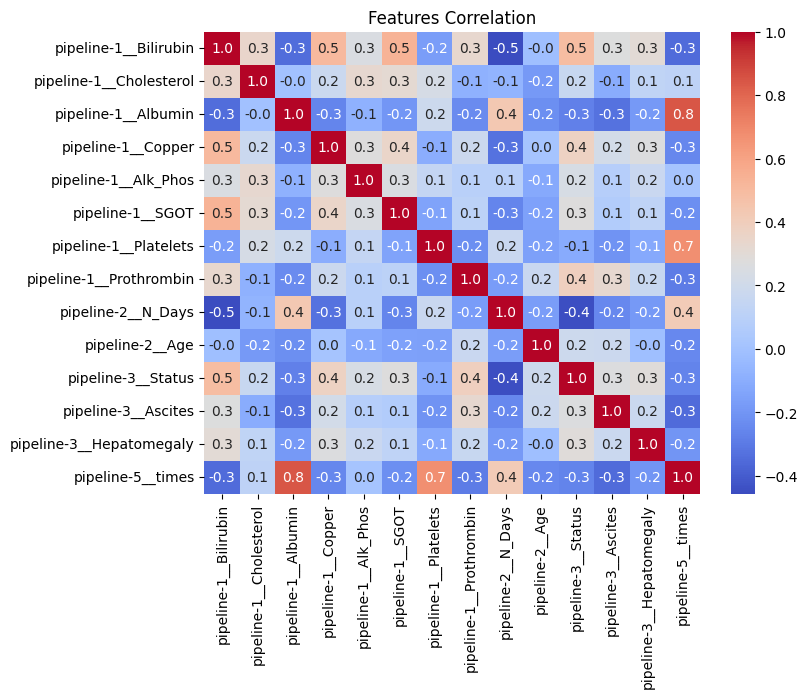

In [264]:
import seaborn as sns 

corr_mat = X_prepared_cut_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Features Correlation")
plt.show()

It seems like number of days and Prothrombin are some of our top 2 features, let's a look at them in the matrix. <br>
Number of days is significantly positively correlated to Albumin, and our custom feature, we may be able to make a new feature doing $nDays * albumin$. It is negatively correlated to Bilirubin, Copper and Status. If we look at the Bilirubin row we can see it is somewhat colinear with Copper, SGOT (which we will ignore since it doesn't seem to be very important) and Status. The new feature will be $bilirubin * copper * status$. 

# New preprocessing pipeline

First we'll need to define our custom column transformations. Before that we'll alter the column name for our $platelets * albumin$ feature. We'll also generalize our column multiplication so it may multiply any arbitrary number of columns. We'll also define a name for our new feature.

In [265]:
def column_mult(X):
    return np.prod(X, axis=1, keepdims=True)

def plal_name(function_transformer, feature_names_in):
    return ["Pl*Al"]

def days_albumin_name(function_transformer, feature_names_in):
    return ["Days*Albumin"]

def bil_cop_stat_name(function_transformer, feature_names_in):
    return ["Bil*Cop*Stat"]

def plal_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_mult, feature_names_out=plal_name),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )

def days_albumin_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_mult, feature_names_out=days_albumin_name),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )

def mult_pipeline():
    mult_preprocessing = make_column_transformer(
        (make_pipeline(
                SimpleImputer(strategy="median")
        ), ["Bilirubin", "Copper"]),
        (make_pipeline(
                SimpleImputer(strategy="most_frequent"), 
                OrdinalEncoder(categories=[category_encodings["Status"]]),
                FunctionTransformer(lambda x: x+1, feature_names_out="one-to-one")
        ), ["Status"])
    )

    return make_pipeline(
        mult_preprocessing,
        FunctionTransformer(column_times, feature_names_out=bil_cop_stat_name),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )

In [266]:
preprocessing = make_column_transformer(
    (log_pipeline, log_features),
    (normal_pipeline, normal_features),
    (categorical_pipeline(categorical), categorical),
    (plal_pipeline(), ["Platelets", "Albumin"]),
    (mult_pipeline(), ["Bilirubin", "Copper", "Status"]),
    remainder="passthrough"
)

In [267]:
X_prepared = preprocessing.fit_transform(X_train)
X_prepared_df = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)
print(X_prepared.shape)

(329, 20)


In [268]:
X_prepared_df.head(1)

,pipeline-1__Bilirubin,pipeline-1__Cholesterol,pipeline-1__Albumin,pipeline-1__Copper,pipeline-1__Alk_Phos,pipeline-1__SGOT,pipeline-1__Tryglicerides,pipeline-1__Platelets,pipeline-1__Prothrombin,pipeline-2__N_Days,pipeline-2__Age,pipeline-3__Status,pipeline-3__Drug,pipeline-3__Sex,pipeline-3__Ascites,pipeline-3__Hepatomegaly,pipeline-3__Spiders,pipeline-3__Edema,pipeline-4__Pl*Al,pipeline-5__Bil*Cop*Stat
ID,,,,,,,,,,,,,,,,,,,,
280,-0.125915,-0.023145,0.471203,-0.091303,0.915665,0.580251,0.643523,0.429766,-1.22949,-0.416981,-0.434681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.524809,-0.127732


# Evaluating New Pipeline

Now that we have our data we can once again try our data with our models, you may have noticed we haven't dropped our features yet. We'll evaluate our model at different stages of dropping features and see which ones perform the best. Starting with our full enhanced dataset.

In [269]:
print("Estimators' cross evaluation with 3 folds")
third_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    third_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds
Gaussian Classifier: 0.20965
SGD Classifier: 0.44693
Linear SVM Classifier: 0.48026
Random Forest Classifier: 0.49247
SVC with RBF Kernel: 0.49855
SVC with Poly Kernel: 0.46191
Logistic Regression Classifier: 0.51371
Multilayer Perceptron Classifier: 0.47117
Decision Tree Classifier: 0.39199


Let's look at our most insignificant features:

In [270]:
d = {"Feature Name": X_prepared_df, "Importance": pre_forest_clf.feature_importances_}
importance_table = pd.DataFrame(index=X_prepared_df.columns, data=pre_forest_clf.feature_importances_, columns=["Weight"])
importance_table.sort_values(by="Weight", ascending=False, inplace=True)
importance_table

,Weight
pipeline-2__N_Days,0.184846
pipeline-1__Prothrombin,0.107462
pipeline-4__Pl*Al,0.090728
pipeline-1__Platelets,0.087760
pipeline-1__Albumin,0.074389
pipeline-2__Age,0.067095
pipeline-5__Bil*Cop*Stat,0.058472
pipeline-1__Copper,0.055046
pipeline-1__Bilirubin,0.044776
pipeline-3__Hepatomegaly,0.037145


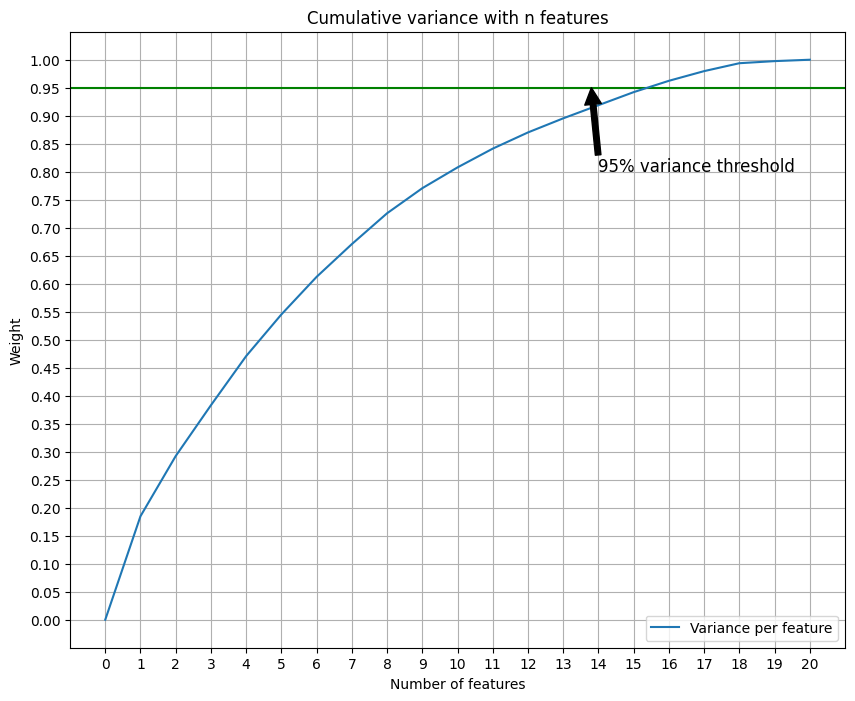

In [271]:
y_vals = list(range(len(importance_table)+1))
importance_variance = np.add.accumulate(importance_table)
importance_variance = np.append([0], importance_variance) # We need to shift our data 1 place to the right

plt.figure(figsize=(10, 8))
plt.title("Cumulative variance with n features")
plt.axhline(y=0.95, color="g", linestyle="-")
plt.plot(y_vals, importance_variance, label="Variance per feature")
plt.legend(loc="lower right")
plt.xticks(np.arange(len(importance_table)+1))
plt.yticks(np.arange(0, 1.01, .05))
plt.grid(True)
plt.xlabel("Number of features")
plt.ylabel("Weight")
plt.annotate(text="95% variance threshold", xy=(13.8, 0.95), xytext=(14, .8), 
             color="black", fontsize=12, arrowprops={"facecolor": "black"}, 
             wrap=True, ha="left")
plt.show()

Again, it seems to change a bit every time you run it but it hovers around 14 or 15 features.

In [272]:
columns_to_cut = importance_table[-5:].index
for column in columns_to_cut:
    print(column)

pipeline-3__Ascites
pipeline-3__Spiders
pipeline-3__Edema
pipeline-3__Sex
pipeline-3__Drug


In [273]:
X_prepared_cut_df = X_prepared_df.drop(columns_to_cut, axis="columns")

Now let's see how it does:

In [274]:
print("Estimators' cross evaluation with 3 folds")
fourth_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_cut_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_cut_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    fourth_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds
Gaussian Classifier: 0.32216
SGD Classifier: 0.44381
Linear SVM Classifier: 0.49850
Random Forest Classifier: 0.52886
SVC with RBF Kernel: 0.50464
SVC with Poly Kernel: 0.46194
Logistic Regression Classifier: 0.51065
Multilayer Perceptron Classifier: 0.43778
Decision Tree Classifier: 0.41018


Finally let's try dropping bilirubin, copper and status. We've been saving how the model performs with the each stage of the data so this way we can determine which is the best overall before we start tuning hyperparameters.

In [275]:
bil_cop_stat = ["pipeline-1__Bilirubin", "pipeline-1__Copper", "pipeline-3__Status"]
X_prepared_cut_df.drop(bil_cop_stat, axis="columns", inplace=True)

In [276]:
print("Estimators' cross evaluation with 3 folds")
fifth_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_cut_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_cut_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    fifth_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds
Gaussian Classifier: 0.27353
SGD Classifier: 0.47415
Linear SVM Classifier: 0.51362
Random Forest Classifier: 0.49847
SVC with RBF Kernel: 0.51974
SVC with Poly Kernel: 0.45291
Logistic Regression Classifier: 0.51974
Multilayer Perceptron Classifier: 0.42869
Decision Tree Classifier: 0.41029


In [277]:
scores_difference.drop(columns="Difference", inplace=True)
scores_difference.drop(labels="Net Difference", axis=0, inplace=True)
second_round_names = ["Creating new features", "Purging worst performing features", "Purging colinear features"]
second_round_scores = [third_scores, fourth_scores, fifth_scores]
for name, data in zip(second_round_names, second_round_scores):
    scores_difference[name] = data

In [278]:
column_mean = np.mean(scores_difference, axis=0)
column_median = np.median(scores_difference, axis=0)
greater_than_50 = np.int8(np.sum(scores_difference > .50, axis=0))
stats_data = {
    "Mean": column_mean,
    "Median": column_median,
    ">50": greater_than_50
}
stats_df = pd.DataFrame(stats_data)
scores_difference = pd.concat([scores_difference, stats_df.T], axis=0)
scores_difference

,Before Dropping,After Dropping,Creating new features,Purging worst performing features,Purging colinear features
Gaussian Classifier,0.197609,0.191465,0.209647,0.322157,0.273534
SGD Classifier,0.449930,0.461913,0.446928,0.443814,0.474145
Linear SVM Classifier,0.462024,0.507506,0.480261,0.498499,0.513622
Random Forest Classifier,0.504615,0.510537,0.492466,0.528857,0.498471
SVC with RBF Kernel,0.504643,0.534946,0.498554,0.504643,0.519739
SVC with Poly Kernel,0.461913,0.471031,0.461913,0.461941,0.452905
Logistic Regression Classifier,0.519766,0.519711,0.513706,0.510648,0.519739
Multilayer Perceptron Classifier,0.422630,0.462052,0.471170,0.437781,0.428691
Decision Tree Classifier,0.395079,0.398137,0.391993,0.410175,0.410286
Mean,0.435357,0.450811,0.440738,0.457613,0.454570


Our second and fifth iteration of the data are both pretty comparable, if you rerun this notebook you might get a different result but it seems like our fifth iteration is just a little better. This is the version of the data we're going to work with.

# One last pipeline
That was pretty dirty, let's tweak our pipeline a little bit to drop the features we dropped just now. Without doing all that extra work. The features we will ignore this time are 
- Alk_Phos
- Edema
- Ascites
- Spiders
- Sex
- Drug

All of them categorical interestingly enough.

In [279]:
columns_to_cut = [feature.split('__')[1] for feature in columns_to_cut]
columns_to_cut

['Ascites', 'Spiders', 'Edema', 'Sex', 'Drug']

In [280]:
numerical = X.select_dtypes(np.number).columns

In [281]:
picked_categorical_features = list(filter(lambda feature: feature not in columns_to_cut, categorical))
picked_numerical_features = list(filter(lambda feature: feature not in columns_to_cut, numerical))

In [282]:
picked_categorical_features

['Status', 'Hepatomegaly']

In [283]:
picked_numerical_features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [284]:
picked_log_features = list(filter(lambda feature: feature in log_features, picked_numerical_features))
picked_normal_features = list(filter(lambda feature: feature in normal_features, picked_numerical_features))

In [285]:
preprocessing = make_column_transformer(
    (log_pipeline, picked_log_features),
    (normal_pipeline, picked_normal_features),
    (categorical_pipeline(picked_categorical_features), picked_categorical_features),
    (plal_pipeline(), ["Platelets", "Albumin"]),
    (mult_pipeline(), ["Bilirubin", "Copper", "Status"]),
    remainder="drop"
)

In [286]:
X_prepared = preprocessing.fit_transform(X_train)
X_prepared_df = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)
print(X_prepared_df.shape)

(329, 15)


# Hyperparameter tuning

Now we can start tuning our models, first we'll define our parameters, note that we will drop the Gaussian NB Classifier at this Stage as it doesn't really look promising, at all.

In [303]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, geom, loguniform, uniform

In [304]:
rf_params = {
    "n_estimators": randint(50, 200),
    "max_depth": geom(1 / 4),
    "min_samples_split": randint(2, 15),
    "min_samples_leaf": randint(1, 15),
    "n_jobs": [-1],
    "random_state": [21]
}

tree_params = {
    "splitter": ["best", "random"],
    "max_depth": geom(1 / 5),
    "min_samples_split": randint(2, 15),
    "min_samples_leaf": randint(1, 15),
    "max_features": ["sqrt", "log2", None, .5],
    "random_state": [21]
}

sgd_params = {
    "loss": ["modified_huber", "perceptron"], # hinge and log loss are too similar to svc and logit respectively
    "penalty": ["l1", "elasticnet"],
    "alpha": loguniform(0.1, 5),
    "l1_ratio": uniform(0, 1),
    "max_iter": [15000],
    "tol": loguniform(1e-5, 1e-1),
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "random_state": [21]
}

lin_svc_params = {
    "tol": loguniform(1e-5, 1e-1),
    "C": loguniform(0.01, 100),
    "max_iter": [5000],
    "probability": [True],
    "random_state": [21]
}

gaussian_svc_params = {
    "C": loguniform(0.01, 10),
    "kernel": ["rbf"],
    "gamma": loguniform(0.01, 30),
    "tol": loguniform(1e-5, 1e-1),
    "probability": [True],
    "random_state": [21]
}

poly_svc_params = {
    "C": loguniform(0.01, 10),
    "kernel": ["poly"],
    "degree": randint(1, 8),
    "gamma": loguniform(0.01, 30),
    "tol": loguniform(1e-5, 1e-1),
    "probability": [True],
    "random_state": [21]
}

logit_params = {
    "l1_ratio": uniform(0, 1),
    "solver": ["saga"],
    "C": loguniform(0.01, 10),
    "tol": loguniform(1e-5, 1e-1),
    "max_iter": [5000],
    "warm_start": [False, True],
    "random_state": [21]
}

In [305]:
classifier_names = ["forest", "tree", "sgd", "lin_sv", "rbf_sv", "poly_sv", "logit"]
classifiers = [RandomForestClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), SVC(), SVC(), LogisticRegression()]
hyperparameters = [rf_params, tree_params, sgd_params, lin_svc_params, gaussian_svc_params, poly_svc_params, logit_params]

In [306]:
randomized_searches = {}
for name, clf, params in zip(classifier_names, classifiers, hyperparameters):
    randomized_searches[f"{name}_search"] = RandomizedSearchCV(clf, param_distributions=params, n_iter=500, cv=4, n_jobs=-1)

In [307]:
for search in randomized_searches.values():
    search.fit(X_prepared_df, y_train)

In [308]:
for name, model in randomized_searches.items():
    print(f"{name} best score: {model.best_score_}")
    print(f"{name} best params: {model.best_params_}")

forest_search best score: 0.5379811930649427
forest_search best params: {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 75, 'n_jobs': -1, 'random_state': 21}
tree_search best score: 0.5135909491625037
tree_search best params: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 7, 'random_state': 21, 'splitter': 'best'}
sgd_search best score: 0.5320305612694681
sgd_search best params: {'alpha': np.float64(0.5067062011664353), 'l1_ratio': np.float64(0.3504384661581569), 'learning_rate': 'constant', 'loss': 'modified_huber', 'max_iter': 15000, 'penalty': 'elasticnet', 'random_state': 21, 'tol': np.float64(2.0537238869457454e-05)}
lin_sv_search best score: 0.5319938289744344
lin_sv_search best params: {'C': np.float64(0.8091893913438727), 'max_iter': 5000, 'probability': True, 'random_state': 21, 'tol': np.float64(0.02316169838553573)}
rbf_sv_search best score: 0.5319938289744344
rbf_sv_search best params: {'C': np.float64(

Now we'll try find more specific parameters for each of our categories with GridSearch

In [309]:
rf_params = {
    "n_estimators": np.arange(70, 81, 5),
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": np.arange(8, 18, 1),
    "min_samples_leaf": np.arange(6, 10, 1),
    "n_jobs": [-1],
    "random_state": [21]
}

tree_params = {
    "splitter": ["best", "random"],
    "max_depth": np.arange(7, 12, 1),
    "min_samples_split": np.arange(8, 13, 1),
    "min_samples_leaf": np.arange(5, 11, 1),
    "max_features": ["log2"],
    "random_state": [21]
}

sgd_params = {
    "loss": ["modified_huber", "perceptron"], # hinge and log loss are too similar to svc and logit respectively
    "penalty": ["l1", "elasticnet"],
    "alpha": np.arange(0.109, 0.113, .00075),
    "l1_ratio": np.arange(0.90, 1.01, .01),
    "max_iter": [15000],
    "tol": np.arange(6.4e-5, 6.61e-5, 1e-6),
    "learning_rate": ["constant", "optimal"],
    "random_state": [21]
}

lin_svc_params = {
    "tol": np.arange(.00155, .001851, 5e-5),
    "C": np.arange(0.9, 1.261, .05),
    "max_iter": [5000],
    "probability": [True],
    "random_state": [21]
}

gaussian_svc_params = {
    "C": np.arange(1.3, 1.71, .05),
    "kernel": ["rbf"],
    "gamma": np.arange(0, .5, .025),
    "tol": np.arange(9e-4, 1.1e-3, 5e-5),
    "probability": [True],
    "random_state": [21]
}

poly_svc_params = {
    "C": np.arange(0.09, 0.11, .0025),
    "kernel": ["poly"],
    "degree": [1, 2, 3],
    "gamma": np.arange(1.1, 1.251, .01),
    "tol": np.arange(0.09, .115, 2.5e-3),
    "probability": [True],
    "random_state": [21]
}

logit_params = {
    "l1_ratio": np.arange(0.29, 0.35, .005),
    "solver": ["saga"],
    "C": np.arange(0.035, 0.451, .025),
    "tol": np.arange(8e-4, 1.1e-3, 2.5e-5),
    "max_iter": [5000],
    "warm_start": [False, True],
    "random_state": [21]
}

In [310]:
hyperparameters = [rf_params, tree_params, sgd_params, lin_svc_params, gaussian_svc_params, poly_svc_params, logit_params]

In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
cv_searches = {}
for name, clf, params in zip(classifier_names, classifiers, hyperparameters):
    cv_searches[f"{name}_grid_search"] = GridSearchCV(clf, param_grid=params, cv=4, n_jobs=-1)

In [313]:
for search in cv_searches.values():
    search.fit(X_prepared_df, y_train)

/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [314]:
for name, model in cv_searches.items():
    print(f"{name} best score: {model.best_score_}")
    print(f"{name} best params: {model.best_params_}")

forest_grid_search best score: 0.5410299735527475
forest_grid_search best params: {'max_depth': 2, 'min_samples_leaf': np.int64(9), 'min_samples_split': np.int64(8), 'n_estimators': np.int64(75), 'n_jobs': -1, 'random_state': 21}
tree_grid_search best score: 0.49555539230091095
tree_grid_search best params: {'max_depth': np.int64(8), 'max_features': 'log2', 'min_samples_leaf': np.int64(5), 'min_samples_split': np.int64(12), 'random_state': 21, 'splitter': 'random'}
sgd_grid_search best score: 0.5136644137525712
sgd_grid_search best params: {'alpha': np.float64(0.11275), 'l1_ratio': np.float64(0.9800000000000001), 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 15000, 'penalty': 'elasticnet', 'random_state': 21, 'tol': np.float64(6.4e-05)}
lin_sv_grid_search best score: 0.5228842198060535
lin_sv_grid_search best params: {'C': np.float64(0.9), 'max_iter': 5000, 'probability': True, 'random_state': 21, 'tol': np.float64(0.00155)}
rbf_sv_grid_search best score: 0.52596973

Great! Now we have all our models fine tuned. Now we can proceed to using a Voting Classifier as our final predictor for the dataset.

In [315]:
from sklearn.ensemble import VotingClassifier

In [316]:
classifiers = [(name, model) for (name, model) in cv_searches.items()]
hard_voting_clf = VotingClassifier(classifiers, voting="hard")
soft_voting_clf = VotingClassifier(classifiers, voting="soft")
hard_voting_clf.fit(X_prepared_df, y_train)
soft_voting_clf.fit(X_prepared_df, y_train)

/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('forest_grid_search', ...), ('tree_grid_search', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",np.int64(75)
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",np.int64(8)
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",np.int64(9)


In [317]:
print(cross_val_score(hard_voting_clf, X_prepared_df, y_train, cv=3).mean())
print(cross_val_score(soft_voting_clf, X_prepared_df, y_train, cv=3).mean())

/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.528829580205727


/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.534890186266333


Looks like one of our individual classifiers, the random forest one, performs better than our whole ensemble. Let's try dropping our worst performing classifier, which is under 50% and see how much we can improve. 

In [318]:
classifiers_v2 = [(name, model) for (name, model) in cv_searches.items()]
classifiers_v2.pop(1)
hard_voting_clf_v2 = VotingClassifier(classifiers_v2, voting="hard")
soft_voting_clf_v2 = VotingClassifier(classifiers_v2, voting="soft")
hard_voting_clf_v2.fit(X_prepared_df, y_train)
soft_voting_clf_v2.fit(X_prepared_df, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('forest_grid_search', ...), ('sgd_grid_search', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",np.int64(75)
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",np.int64(8)
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",np.int64(9)


In [319]:
print(cross_val_score(hard_voting_clf_v2, X_prepared_df, y_train, cv=3).mean())
print(cross_val_score(soft_voting_clf_v2, X_prepared_df, y_train, cv=3).mean())

/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.525799277175424


/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.534890186266333


# Trying it on the test set

Indeed it looks like our Random Forest Predictor is the best one. So let's see how it fares on the test set.

In [320]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [321]:
X_test_prepared = preprocessing.fit_transform(X_test)
X_test_df = pd.DataFrame(
    X_test_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_test.index
)

In [322]:
tuned_forest_clf = classifiers[0][1]
test_preds = tuned_forest_clf.predict(X_test_df)

In [323]:
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Test Recall: {recall_score(y_test, test_preds, average="weighted")}")
print(f"Test Precision: {precision_score(y_test, test_preds, average="weighted")}")

Test Accuracy: 0.5180722891566265
Test Recall: 0.5180722891566265
Test Precision: 0.6149124801091157


/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


As expected it's a little worse than our train set scores, let's see how our hard and soft voting classifiers do

In [324]:
hard_test_preds = hard_voting_clf.predict(X_test_df)
soft_test_preds = soft_voting_clf.predict(X_test_df)

In [325]:
print("Hard Voting Classifier")
print(f"Test Accuracy: {accuracy_score(y_test, hard_test_preds)}")
print(f"Test Recall: {recall_score(y_test, hard_test_preds, average="weighted")}")
print(f"Test Precision: {precision_score(y_test, hard_test_preds, average="weighted")}")

Hard Voting Classifier
Test Accuracy: 0.5301204819277109
Test Recall: 0.5301204819277109
Test Precision: 0.47052495697074015


/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [327]:
print("Soft Voting Classifier")
print(f"Test Accuracy: {accuracy_score(y_test, soft_test_preds)}")
print(f"Test Recall: {recall_score(y_test, soft_test_preds, average="weighted")}")
print(f"Test Precision: {precision_score(y_test, soft_test_preds, average="weighted")}")

Soft Voting Classifier
Test Accuracy: 0.5060240963855421
Test Recall: 0.5060240963855421
Test Precision: 0.4502581755593803


/home/isa/ML/cirrhosis/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
